# Day 4 Lab, IS 4487

This lab is designed specifically to prepare you to complete the project assignment for today. We will go through code (using the MegaTelCo data as an example) that you will be able to adapt for the AdviseInvest project. Here is what you need to be able to do:

1. Identify the target variable for an analysis based on the business problem.
2. Clean the data by removing NAs, and filtering out rows with incorrect values.
3. Identify and recode features that should be categorical (or factor) variables.
4.  Compute the mean of a binary variable.

In addition we will do a bit more EDA on the MegaTelCo data, as preparation for tomorrow's project assignment.

# Load Libraries

In [2]:
import pandas as pd
import matplotlib as mpl


# Load Data


In [3]:
mtc = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/dd870389117d5b24eee7417d5378d80496555130/Labs/DataSets/megatelco_leave_survey.csv")


# 1. Clean Data

Recall that we use square bracket notation with logical conditions to create a boolean mask for filtering:

In [4]:
mtc_clean = mtc[(mtc['house'] > 0) & (mtc['income'] > 0) & (mtc['handset_price'] < 1000)]

mtc_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4994.000000,4997.000000,4997.000000
mean,79918.829498,85.116270,24.247549,494019.823294,387.558935,7.739287,5.957174,10034.365619
std,41673.392025,85.638266,26.848091,253648.357473,213.614256,8.802897,4.388938,5814.189195
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41593.000000,0.000000,0.000000,260729.000000,219.000000,1.000000,2.000000,4949.000000
50%,75026.000000,59.000000,15.000000,452277.000000,322.000000,4.000000,5.000000,10125.000000
75%,115464.000000,177.000000,42.000000,701614.000000,528.000000,14.000000,9.000000,15084.000000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


Does this dataset have an missing values -- NAs? We use the `.isna()` function. (`.isnull()` is also possible.) Combined with `.sum()` we can obtain a count of NAs in the dataset.

In [5]:
# Identify NAs in a dataset
mtc.isna().sum()


college                        0
income                         0
overage                        0
leftover                       0
house                          0
handset_price                  0
over_15mins_calls_per_month    3
average_call_duration          0
reported_satisfaction          0
reported_usage_level           0
considering_change_of_plan     0
leave                          0
id                             0
dtype: int64

It appears there are indeed 3 NAs in the `over_15mins_calls_per_month` column. How do we remove them? Use the `.dropna()` function.

In [6]:
# remove NAs

mtc_clean = mtc_clean.dropna()


# 1. Identify the target

The target variable is the data representation of the phenomenon, we are interested in predicting or explaining. In this case, customers are churning. This represents a problem for the business, something we would like to improve. Hence the churn variable, `leave`, will be the target.

The target variable will always depend on the specific business context in which the analysis is taking place.


# 2. Compute the mean of a binary variable  

What is the proportion of people who churned? There are lots of ways of doing this.  But here is a straightforward approach based on the idea of :using a boolean mask.  `leave` is categorical but we can make it into True/False and then take the mean.

Remember that a *proportion* is a number between 0 and 1, while a *percentage* is a number between 0 and 100.



In [5]:
# Here is the mask
mtc_clean['leave'] == "LEAVE"

0        True
1        True
2       False
3        True
4       False
        ...  
4995     True
4996    False
4997    False
4998    False
4999     True
Name: leave, Length: 4997, dtype: bool

Take the mean of the series to get the proportion of leavers.  This works because Python treats `True` as 1 and `False` as 0.

Here's an example:

In [9]:
series = pd.Series([True, False, True, False, True]) # 3/5 True = .6 or 60%
series


0     True
1    False
2     True
3    False
4     True
dtype: bool

In [10]:
series.mean()*100 # should be 60%

60.0

# Your Turn: Compute the mean of a binary series

1. Create a short Pandas series consisting in 0s and 1s.
2. Calculate the proportion of 1s.

In [ ]:
# Write your code here

# Plot a numeric (or count) variable against a categorical variable.

We've introduced and practiced with these plot types:

- Bar plot
- Histogram
- Box plot
- Scatter plot

Which one works best for showing the relationship between a numeric variable and a categorical variable?

A bar plot is good for showing a how a statistical summary, like a mean or a count, varies with the levels of a categorical variable. But it does not show the distribution of values, just the summary statistic.

In the bar, plot below, the height of the bars is determined by the pre-calculated average house price.

<Axes: title={'center': 'Average house prices by churn status'}, xlabel='leave'>

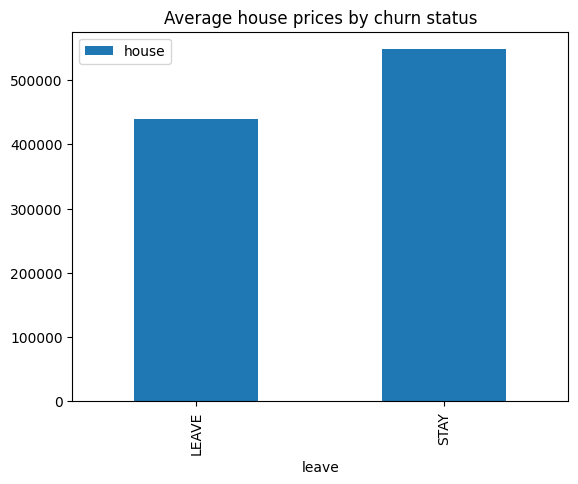

In [12]:
#Bar plot
mtc_clean[['house','leave']].groupby('leave').mean('house').plot(kind = "bar", title = "Average house prices by churn status")


A histogram will not work very well because it shows the distribution of a single variable.

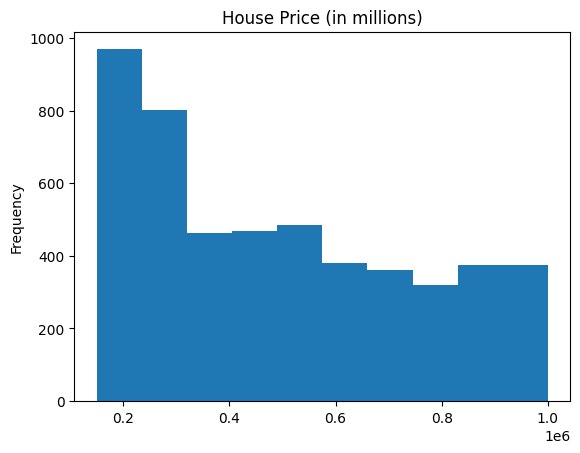

In [ ]:
#Histogram
mtc_clean['house'].plot(kind = "hist", bins=10,title = 'House Price (in millions)')


A box plot does what we need. On the X axis we have the two levels of `leave`, a categorical variable, and the boxes show the distribution of numeric house prices at each level.

house    Axes(0.125,0.11;0.775x0.77)
dtype: object

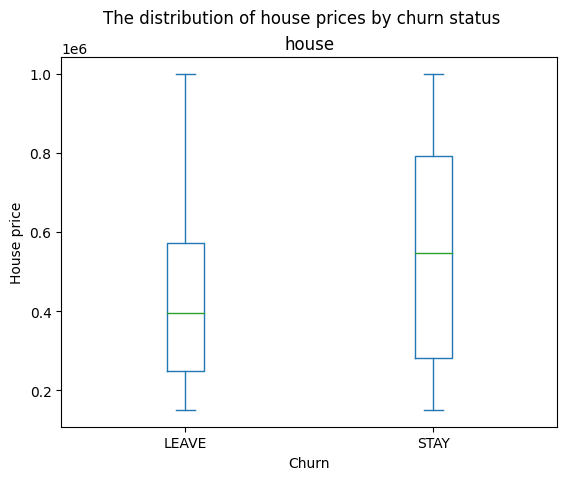

In [38]:
#Boxplot
mtc_clean[['house','leave']].plot(kind = "box",
                                  column = "house",
                                  by='leave',
                                  title = "The distribution of house prices by churn status",
                                  ylabel = "House price",
                                  xlabel = "Churn")

# Your Turn

Create another boxplot

In [ ]:
# write your code here

# 4. Calculate a count (and a proportion) for a categorical variable and visualize the result into a plot.

# Explore Relationships

###How does College affect leaving?

In [ ]:
#Bar chart with counts
mtc_clean[['college','leave']].groupby('leave').count().plot.bar()

In [ ]:
#Bar chart with percentage
college_summary = mtc_clean[['college','leave']].groupby('leave').count()

college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100
#college_summary.head()
college_summary.plot.bar()

### How does phone price affect leaving?

In [ ]:
#Bar chart with mean price
handset_price_summary = mtc_clean[['handset_price','leave']].groupby('leave').mean(['handset_price'])
#handset_price_summary.head()

handset_price_summary.plot.bar()

### How about considering leaving?

In [ ]:
#Bar chart with percentage
plan = mtc_clean[['considering_change_of_plan','leave']].groupby('leave').count()

plan['considering_change_of_plan'] = (plan['considering_change_of_plan'] / plan['considering_change_of_plan'].sum()) * 100

plan.plot.bar()

## Create a Pair Plot
➡️ Assignment Tasks
- Import seaborn
- Create a Seaborn "pairplot" using all variables, with the color determine by "leave"
- Display the plot

In [ ]:
#pair plot

## Additional Cleanup

➡️ Assignment Tasks

- Remove any records with null values from the dataframe

## Summarize Data

➡️ Assignment Tasks
- Create a second set of charts that include the outlier values (house, income, price).   How do the outliers affect the values in the charts?

In [ ]:
# house price

In [ ]:
# income

In [ ]:
# price